E:\program files\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


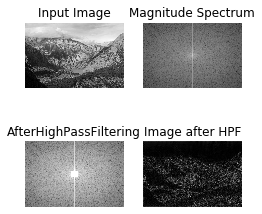

In [3]:
#high pass filter in frequency domain

import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('nepal.jpeg',0)

#Fourier Transform
f = np.fft.fft2(img)

#Move the DC Component of the FFT output to the center of the spectrum
fshift = np.fft.fftshift(f)

#logarithmic transformation
magnitude_spectrum = 20*np.log(np.abs(fshift))

#Create mask
rows, cols = img.shape
crow, ccol = rows/2,cols/2

fshift[int(crow - 30):int(crow + 30),int(ccol - 30):int(ccol + 30) ] = 0

#Log Tranformation
magnitude_spectrum1 = 20*np.log(np.abs(fshift))
f_ishift = np.fft.ifftshift(fshift)

#inverse Fourier Transform
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(231),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'),plt.axis('off')

plt.subplot(232),plt.imshow(magnitude_spectrum,cmap = 'gray')
plt.title('Magnitude Spectrum'),plt.axis('off')

plt.subplot(234),plt.imshow(magnitude_spectrum1,cmap = 'gray')
plt.title('AfterHighPassFiltering'),plt.axis('off')

plt.subplot(235),plt.imshow(img_back,cmap = 'gray')
plt.title('Image after HPF'),plt.axis('off')

plt.show()
